## Project Outline

In [ ]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset
# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

# CSE 708 Class Project

## Problem Definition, Data Overview



```
Given a dataset, I am going to train a number of models, based on various classifiers explored
in this class. I am also going to explore the effects of some machine learning techniques on performance
as discussed in the lectures. I am working on a classification problem project, and the dataset
I am using is a binary classification dataset. The following is a brief description of the
dataset, as well as its associated task.
```



The dataset is the Census Income dataset, taken form the UC Irvine Machine Learning Repository. It is a dataset that was extracted from the 1994 Census database, with the following initial description:

    Multivariate dataset, with 14 features, which are both categorical and integer
    48842 instances, mix of continuous and discrete    (train=32561, test=16281)
    45222 if instances with unknown values are removed (train=30162, test=15060)
    Duplicate or conflicting instances : 6
    Class probabilities for adult.all file
    Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
    Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

The prediction task is to determine whether a person makes over 50K a year.
This prediction would be performed using various classifiers that have been
learned in this class, as well as others not covered

## Library Imports, Load Dataset

### Library Imports

In [ ]:
import math
import time
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


### Load Dataset

In [ ]:
#names=['Age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
df = pd.read_csv('adult.csv')

## Feature Engineering 1




### Exploratory Data Analysis 1

In [ ]:
print(df.shape)

(32561, 15)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
print(df['income'].value_counts())
print(df['income'].value_counts(normalize = True))

<=50K    24720
>50K      7841
Name: income, dtype: int64
<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64


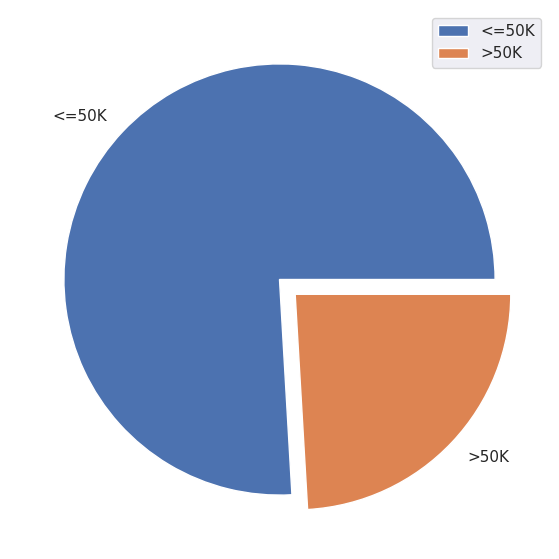

In [ ]:
plt.pie(df['income'].value_counts(normalize = True), labels = ['<=50K', '>50K'] , explode = [0, 0.1])
plt.legend()
plt.show()

### Data Cleaning 1

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [ ]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [ ]:
df['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [ ]:
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [ ]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [ ]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

### Data Cleaning 2

In [ ]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Exploratory Data Analysis 2

In [ ]:
print(df.shape)

(30162, 15)


In [ ]:
print(df['income'].value_counts())
print(df['income'].value_counts(normalize = True))

<=50K    22654
>50K      7508
Name: income, dtype: int64
<=50K    0.751078
>50K     0.248922
Name: income, dtype: float64


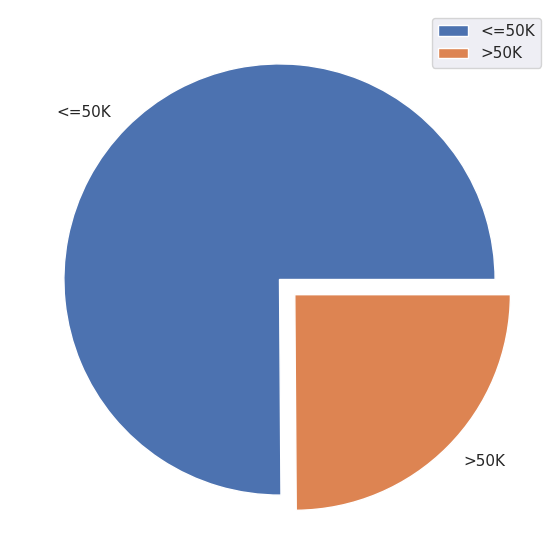

In [ ]:
plt.pie(df['income'].value_counts(normalize = True), labels = ['<=50K', '>50K'] , explode = [0, 0.1])
plt.legend()
plt.show()

## Descriptive Statistics

### Data Description

In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Correlation Matrix

In [ ]:
df.corr(method='pearson')

<ipython-input-201-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


<ipython-input-202-863875275bd7>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


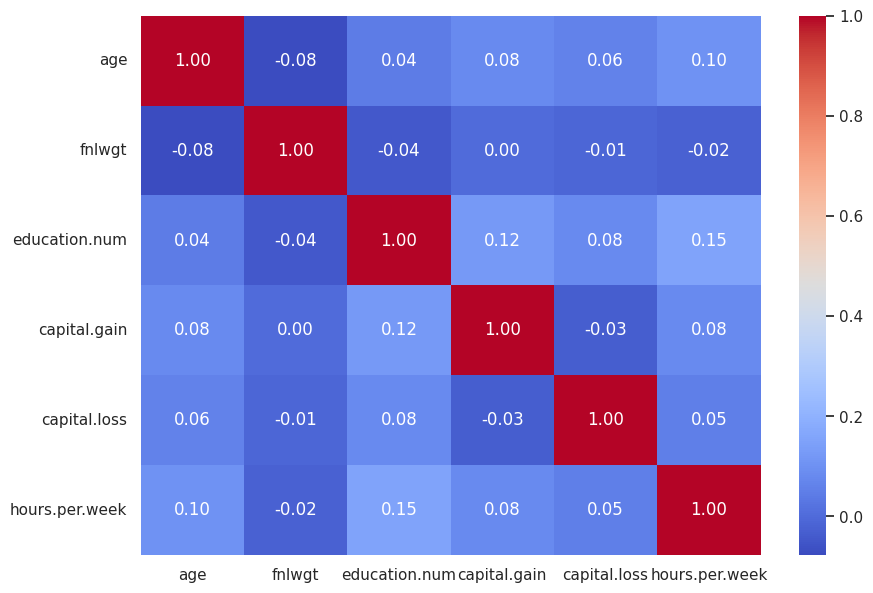

In [ ]:
'''fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

'''
# Correlation matrix between numerical values
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()


###Bar plots

In [ ]:
colors = ['orange', 'black']
#sns.set(rc = {'figure.figsize':(20,7)})




##### Age

[Text(0.5, 1.0, 'Age vs Census Income')]

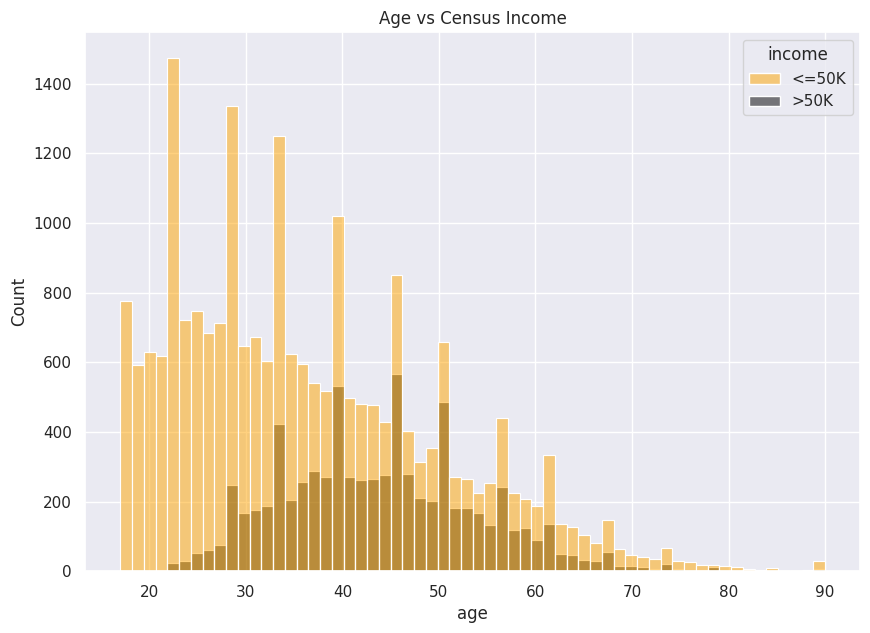

In [ ]:
sns.histplot(df, x="age", hue="income",  palette=colors).set(title='Age vs Census Income')

##### fnlwgt

[Text(0.5, 1.0, 'Workclass vs Census Income')]

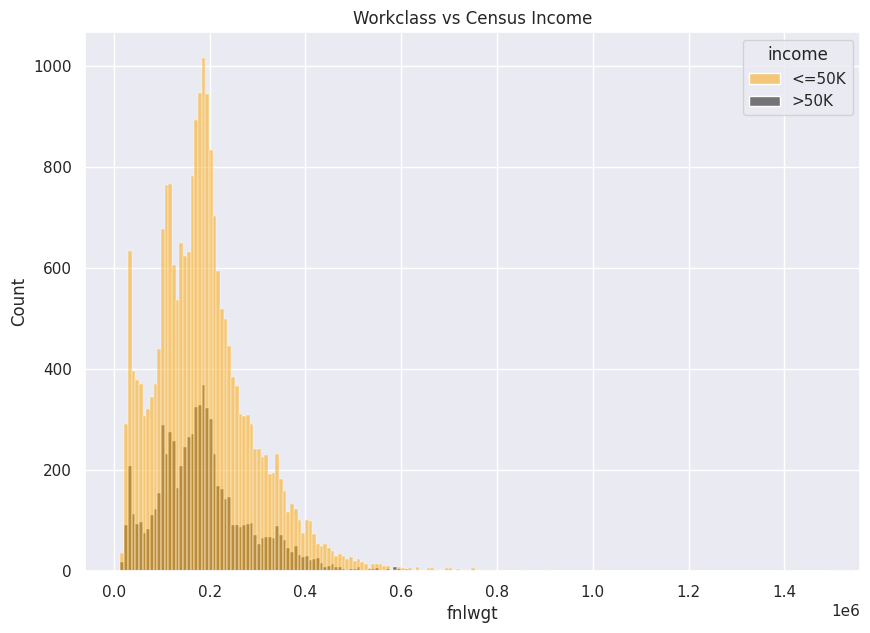

In [ ]:
sns.histplot(df, x="fnlwgt", hue="income", palette=colors).set(title='Workclass vs Census Income')

##### Workclass

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'State-gov'),
  Text(2, 0, 'Federal-gov'),
  Text(3, 0, 'Self-emp-not-inc'),
  Text(4, 0, 'Self-emp-inc'),
  Text(5, 0, 'Local-gov'),
  Text(6, 0, 'Without-pay')])

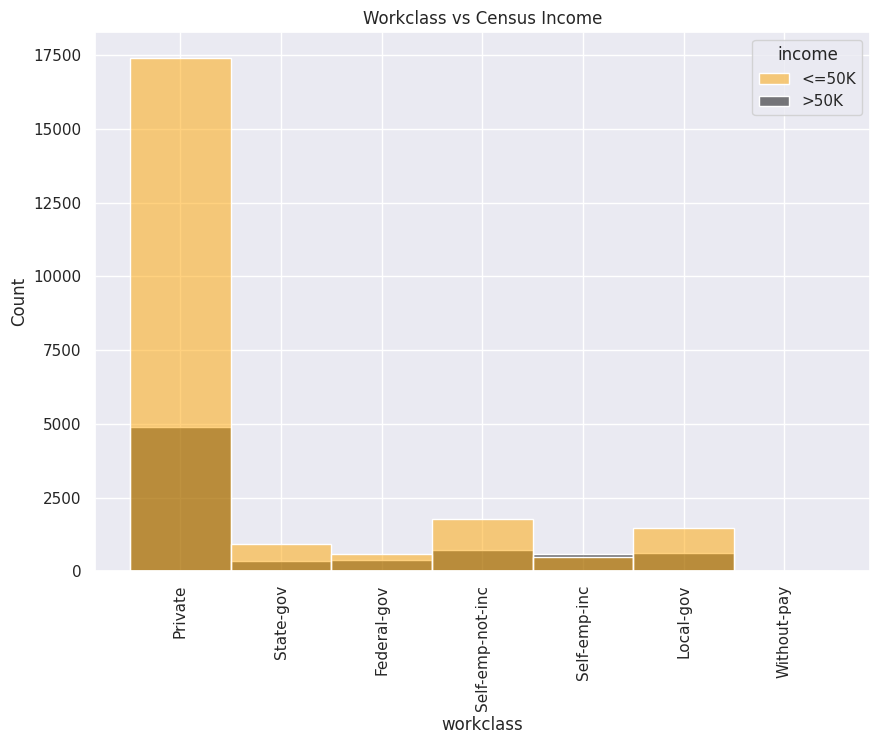

In [ ]:
#sns.set(rc = {'figure.figsize':(20,7)})
sns.histplot(df, x="workclass", hue="income", palette=colors).set(title='Workclass vs Census Income')
plt.xticks(rotation = 90)

##### Education

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, '7th-8th'),
  Text(2, 0, 'Some-college'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-voc'),
  Text(10, 0, '1st-4th'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, 'Assoc-acdm'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th'),
  Text(15, 0, 'Preschool')])

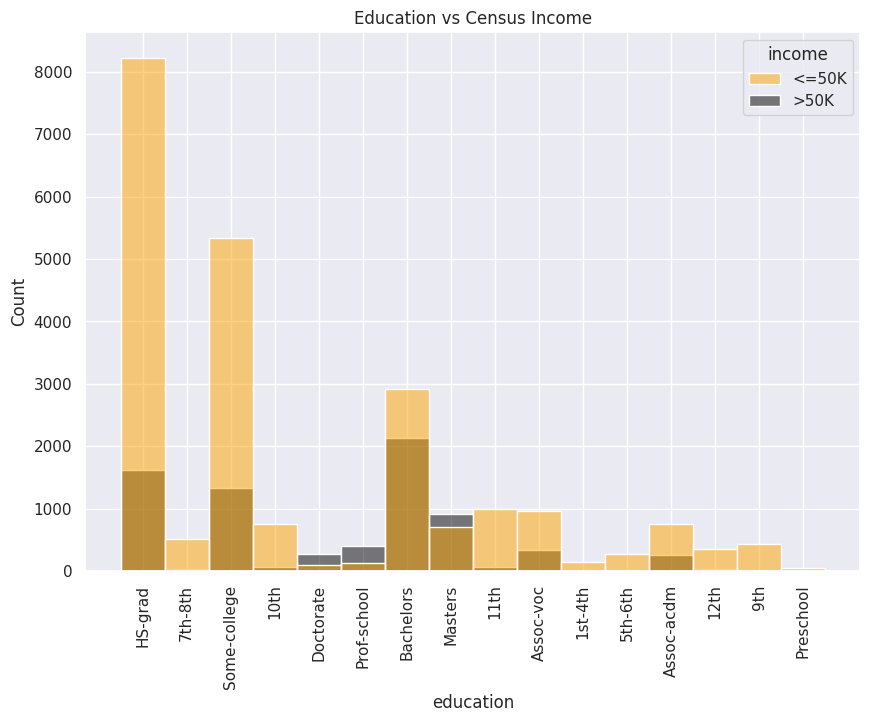

In [ ]:
#sns.set(rc = {'figure.figsize':(20,7)})
sns.histplot(df, x="education", hue="income",   palette=colors).set(title='Education vs Census Income')
plt.xticks(rotation = 90)

##### education.num

[Text(0.5, 1.0, 'Workclass vs Census Income')]

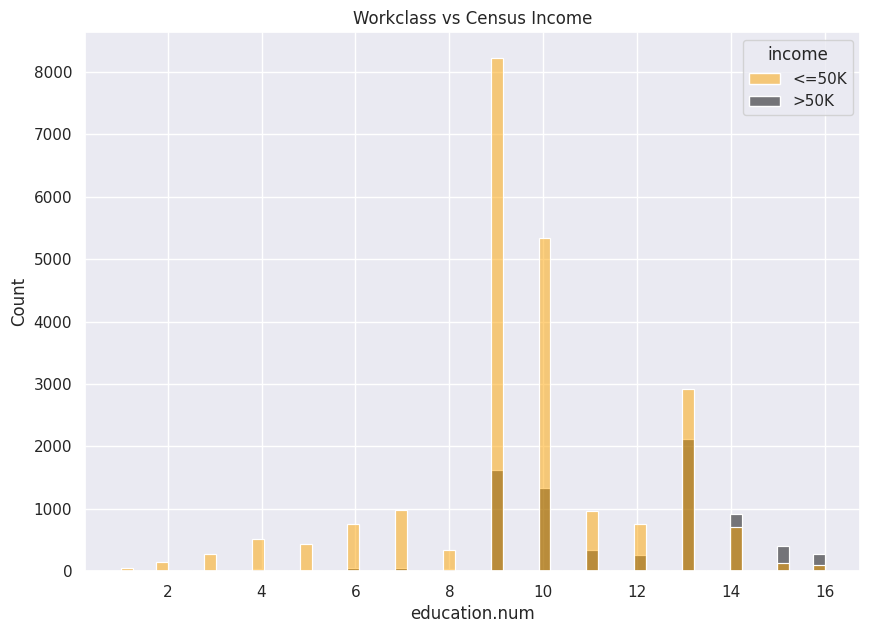

In [ ]:
sns.histplot(df, x="education.num", hue="income", palette=colors).set(title='Workclass vs Census Income')

##### Marital Status

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Widowed'),
  Text(1, 0, 'Divorced'),
  Text(2, 0, 'Separated'),
  Text(3, 0, 'Never-married'),
  Text(4, 0, 'Married-civ-spouse'),
  Text(5, 0, 'Married-spouse-absent'),
  Text(6, 0, 'Married-AF-spouse')])

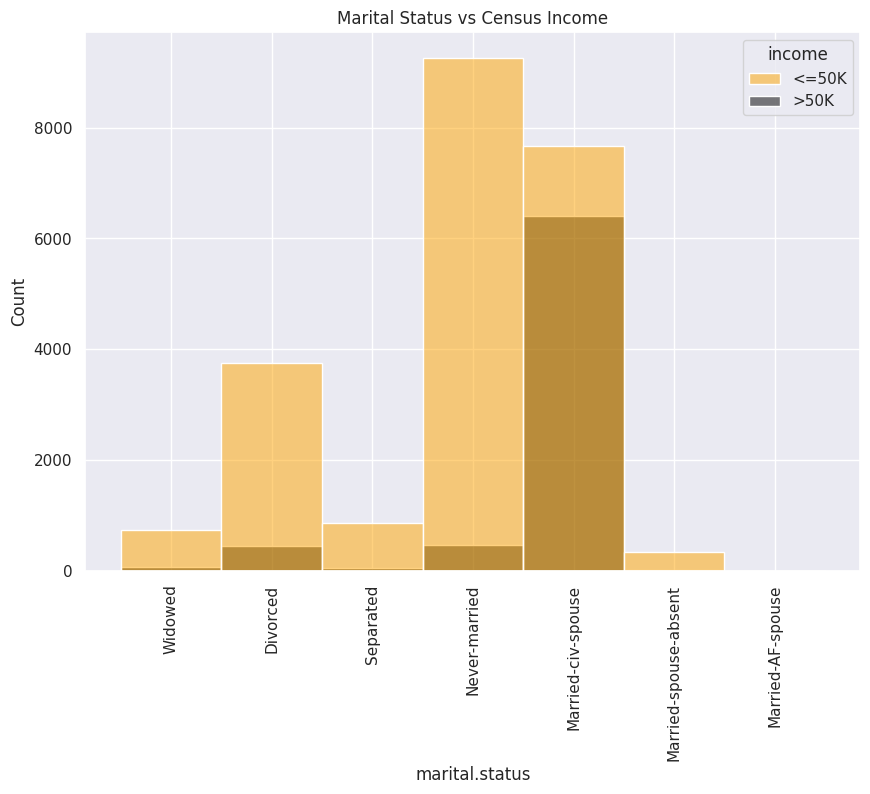

In [ ]:
#sns.set(rc = {'figure.figsize':(20,7)})
sns.histplot(df, x="marital.status", hue="income",   palette=colors).set(title='Marital Status vs Census Income')
plt.xticks(rotation = 90)

##### occupation

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Exec-managerial'),
  Text(1, 0, 'Machine-op-inspct'),
  Text(2, 0, 'Prof-specialty'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Adm-clerical'),
  Text(5, 0, 'Transport-moving'),
  Text(6, 0, 'Sales'),
  Text(7, 0, 'Craft-repair'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Protective-serv'),
  Text(11, 0, 'Handlers-cleaners'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

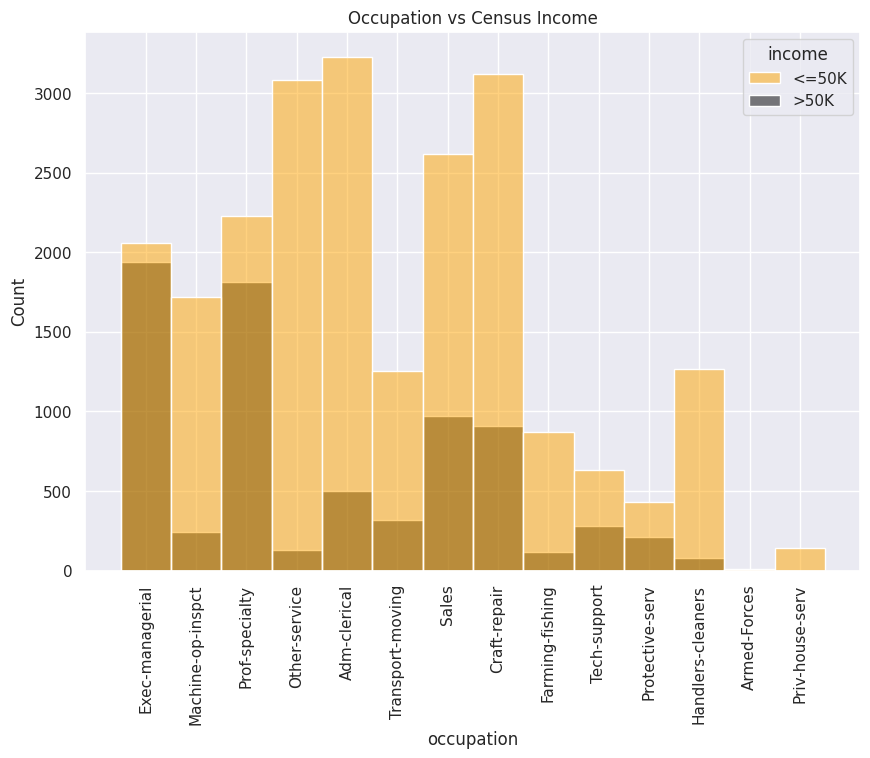

In [ ]:
#sns.set(rc = {'figure.figsize':(27,8.5)})
sns.histplot(df, x="occupation", hue="income",   palette=colors).set(title='Occupation vs Census Income')
plt.xticks(rotation = 90)

##### relationship

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Unmarried'),
  Text(2, 0, 'Own-child'),
  Text(3, 0, 'Other-relative'),
  Text(4, 0, 'Husband'),
  Text(5, 0, 'Wife')])

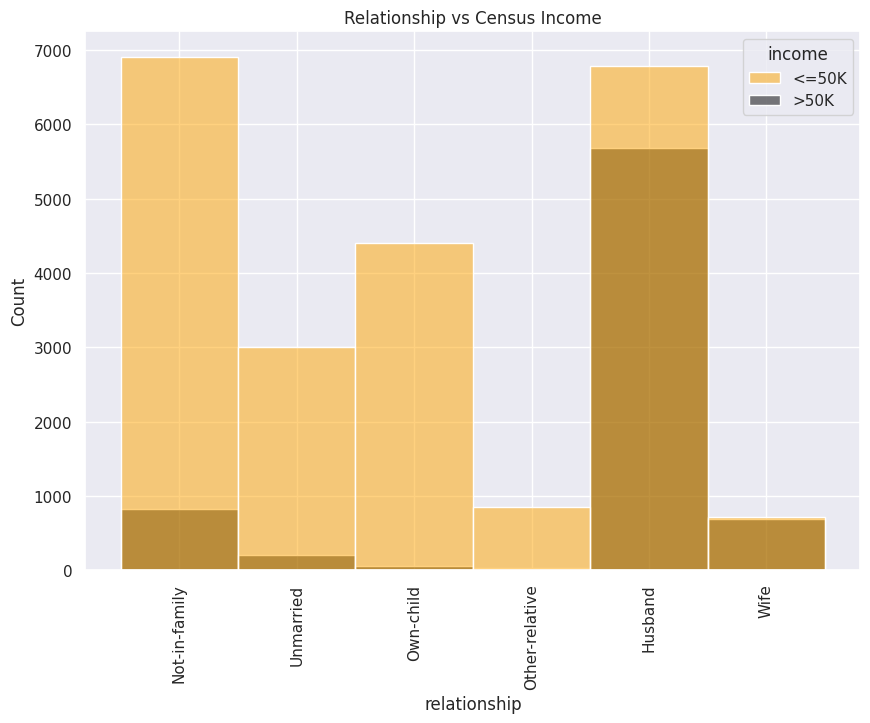

In [ ]:
#sns.set(rc = {'figure.figsize':(20,7)})
sns.histplot(df, x="relationship", hue="income", palette=colors).set(title='Relationship vs Census Income')
plt.xticks(rotation = 90)

##### race

([0, 1, 2, 3, 4],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Amer-Indian-Eskimo')])

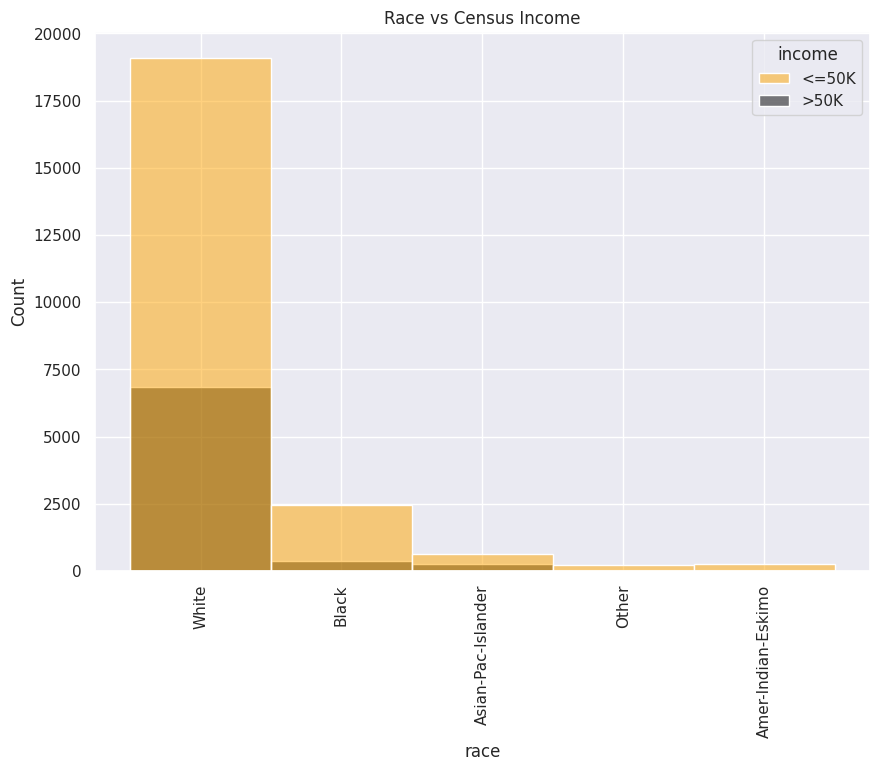

In [ ]:
#sns.set(rc = {'figure.figsize':(20,7)})
sns.histplot(df, x="race", hue="income", palette=colors).set(title='Race vs Census Income')
plt.xticks(rotation = 90)

##### sex

[Text(0.5, 1.0, 'Sex vs Census Income')]

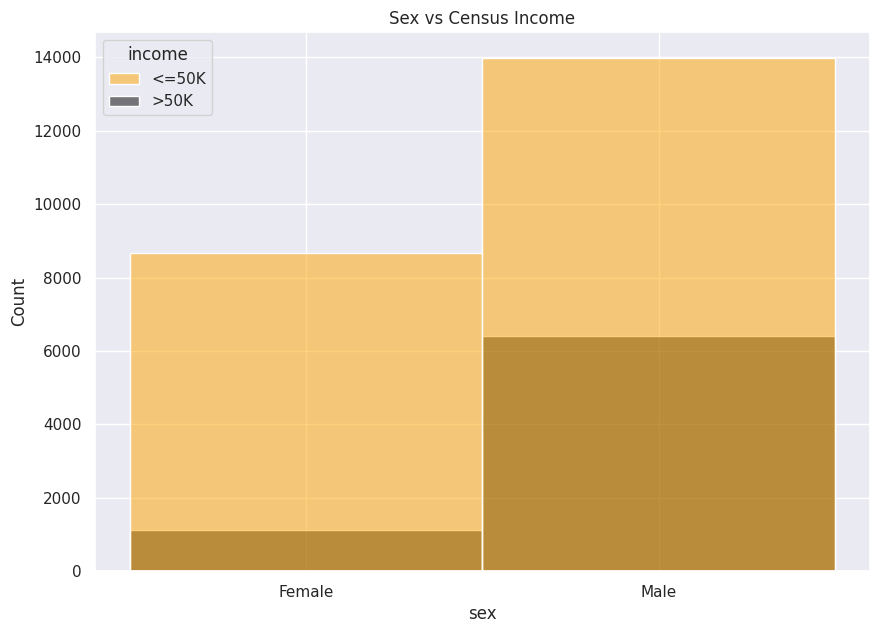

In [ ]:
#sns.set(rc = {'figure.figsize':(10,7)})
sns.histplot(df, x="sex", hue="income", binwidth=0.2, palette=colors).set(title='Sex vs Census Income')


##### capital_gain

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

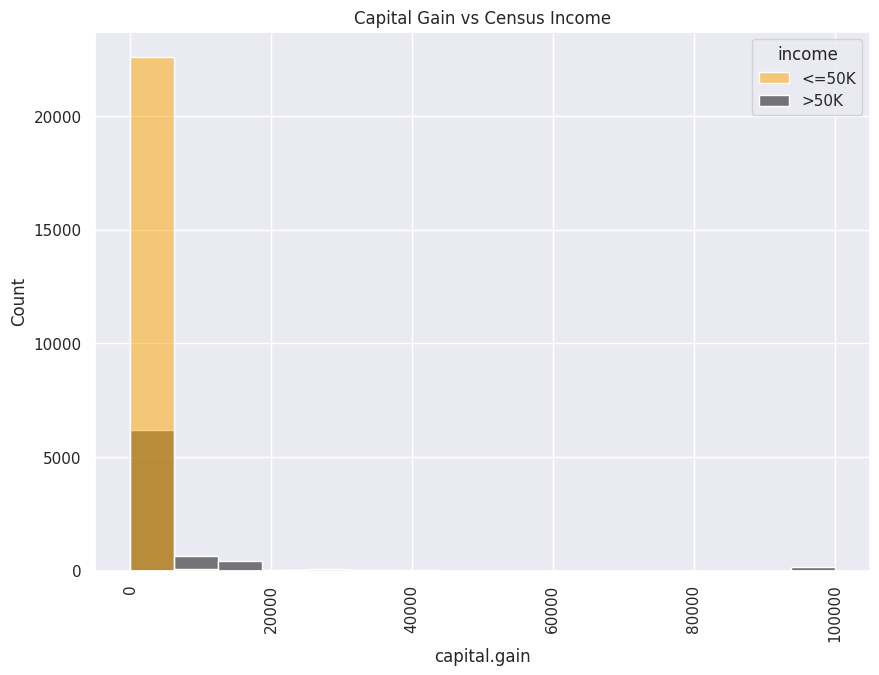

In [ ]:
#sns.set(rc = {'figure.figsize':(20,7)})
sns.histplot(df, x="capital.gain", hue="income", palette=colors).set(title='Capital Gain vs Census Income')
plt.xticks(rotation = 90)

##### capital_loss

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000')])

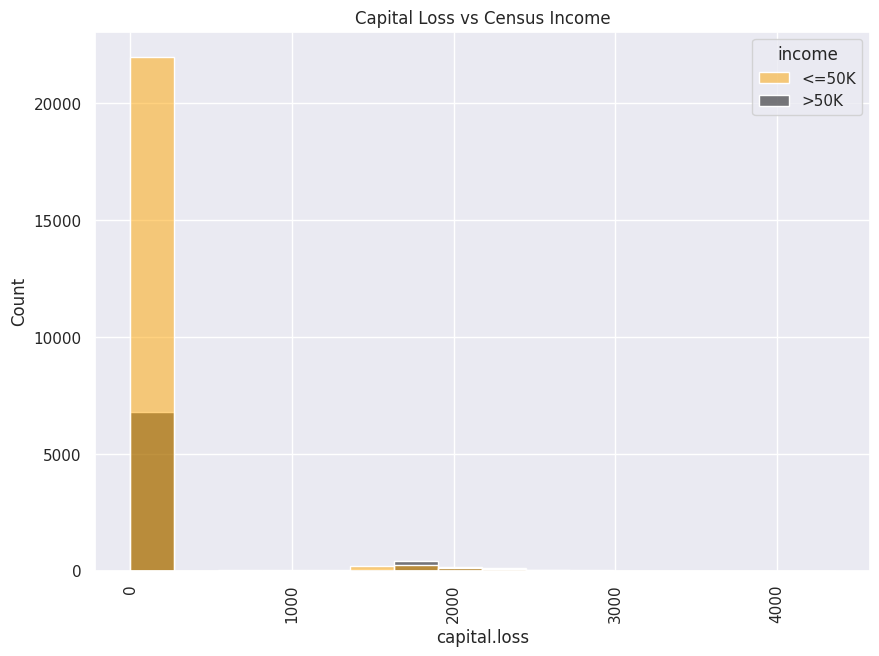

In [ ]:
#sns.set(rc = {'figure.figsize':(20,7)})
sns.histplot(df, x="capital.loss", hue="income",   palette=colors).set(title='Capital Loss vs Census Income')
plt.xticks(rotation = 90)

##### hours_per_week

[Text(0.5, 1.0, 'Hours worked per week vs Census Income')]

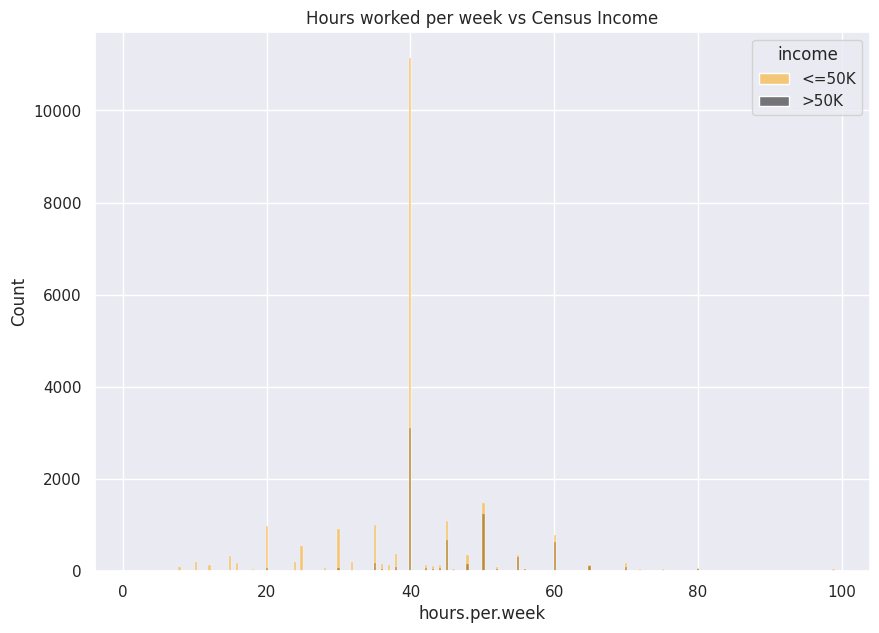

In [ ]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.histplot(df, x="hours.per.week", hue="income",   palette=colors).set(title='Hours worked per week vs Census Income')

##### native_country

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Mexico'),
  Text(2, 0, 'Greece'),
  Text(3, 0, 'Vietnam'),
  Text(4, 0, 'China'),
  Text(5, 0, 'Taiwan'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Philippines'),
  Text(8, 0, 'Trinadad&Tobago'),
  Text(9, 0, 'Canada'),
  Text(10, 0, 'South'),
  Text(11, 0, 'Holand-Netherlands'),
  Text(12, 0, 'Puerto-Rico'),
  Text(13, 0, 'Poland'),
  Text(14, 0, 'Iran'),
  Text(15, 0, 'England'),
  Text(16, 0, 'Germany'),
  Text(17, 0, 'Italy'),
  Text(18, 0, 'Japan'),
  Text(19, 0, 'Hong'),
  Text(20, 0, 'Honduras'),
  Text(21, 0, 'Cuba'),
  Text(22, 0, 'Ireland'),
  Text(23, 0, 'Cambodia'),
  Text(24, 0, 'Peru'),
  Text(25, 0, 'Nicaragua'),
  Text(26, 0, 'Dominican-Republic'),
  Text(27, 0, 'Haiti'),
  Text(28, 0, 'Hungary'),


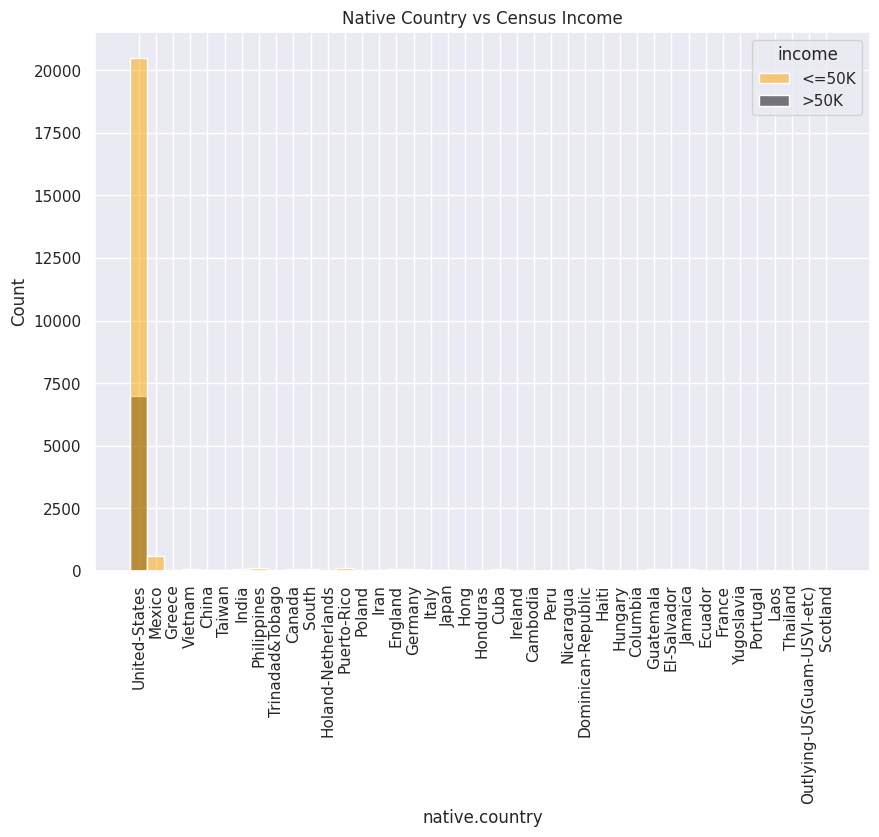

In [ ]:
#sns.set(rc = {'figure.figsize':(50,7)})
sns.histplot(df, x="native.country", hue="income",   palette=colors).set(title='Native Country vs Census Income')
plt.xticks(rotation = 90)

## Feature Engineering 2

In [ ]:
X = df.drop(['income','fnlwgt', 'education'], axis = 1)
Y = df['income']

### Train Validation Split

In [ ]:
seed = 10
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = seed)

#X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.3, stratify = Y)

### Label Encoding

In [ ]:
categorical = ['workclass',  'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_valid[feature] = le.transform(X_valid[feature])

In [ ]:
#df['education'].unique()

In [ ]:
#X_train['education.num'].unique()

In [ ]:
#X_train['education'].unique()

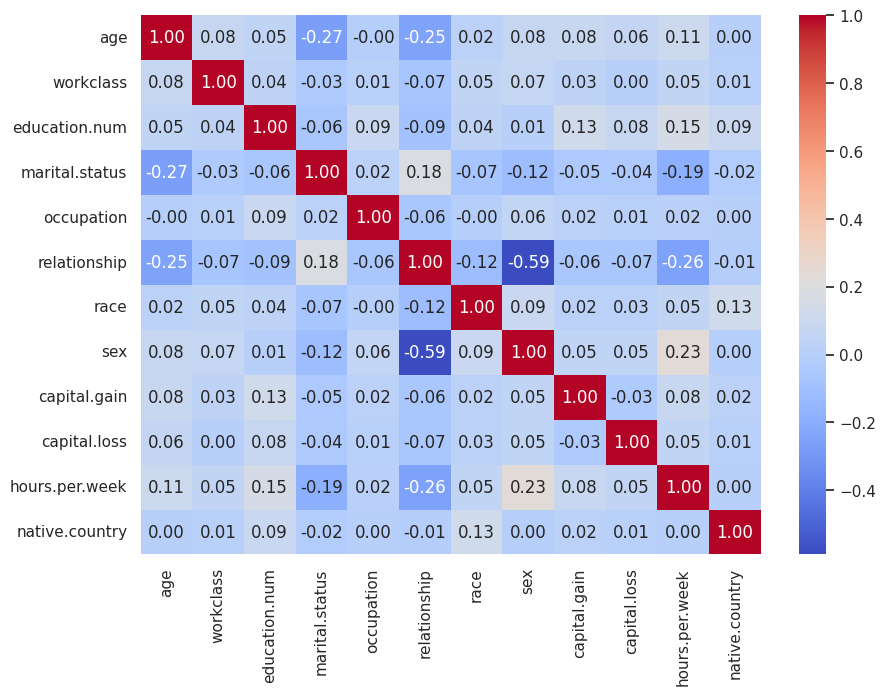

In [ ]:
#X_train.corr(method='pearson')
g = sns.heatmap(X_train.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

### Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns = X.columns)

## Model Prep/Algo Evaluation/Perf Metrics

### Tested Algorithms

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=[20, 10], learning_rate_init=0.5, max_iter=2000, activation='logistic', solver='sgd')))

### Model Training

In [ ]:
from sklearn.metrics import make_scorer, average_precision_score
scorer = make_scorer(f1_score, pos_label = '>50K')
num_folds = 5
#scoring = {'accuracy': 'precision', 'custom': scorer}

####Accuracy

In [ ]:
acc_results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=num_folds, shuffle = True, random_state=seed)
  #kfold = StratifiedKFold(n_splits=num_folds, shuffle = True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  acc_results.append(cv_results)
  names.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

LR: 0.819637
KNN: 0.825605
CART: 0.808081
NB: 0.795624
SVM: 0.843177
MLP: 0.839530


#### F1 score

In [ ]:
f1_results = []
names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=num_folds, shuffle = True, random_state=seed)
  #kfold = StratifiedKFold(n_splits=num_folds, shuffle = True)
  cv_results = cross_validate(model, X_train,  y_train, cv=kfold, scoring=scorer)['test_score']
  f1_results.append(cv_results)
  names.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

### Algorithm Performance Comparison

#### Accuracy

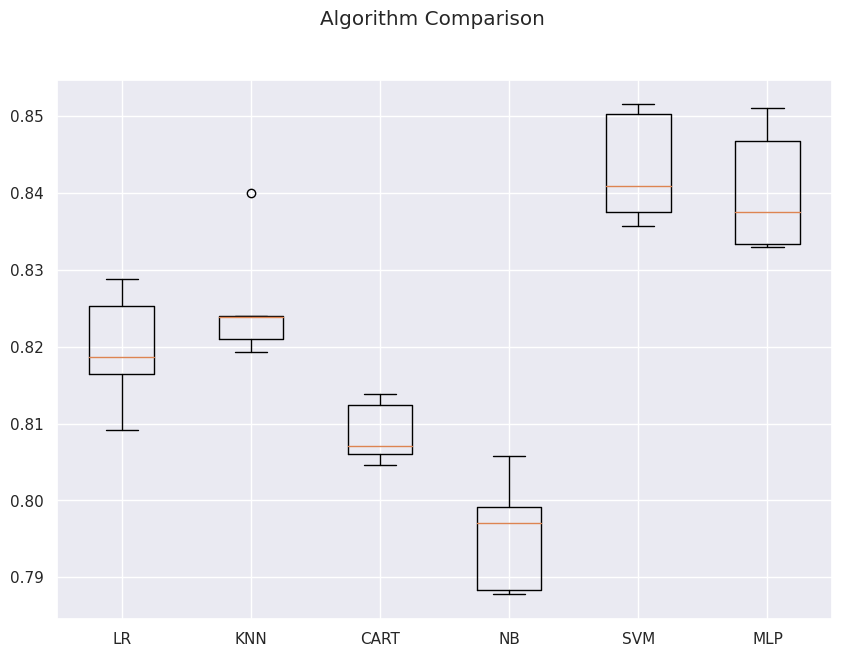

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

#### F1

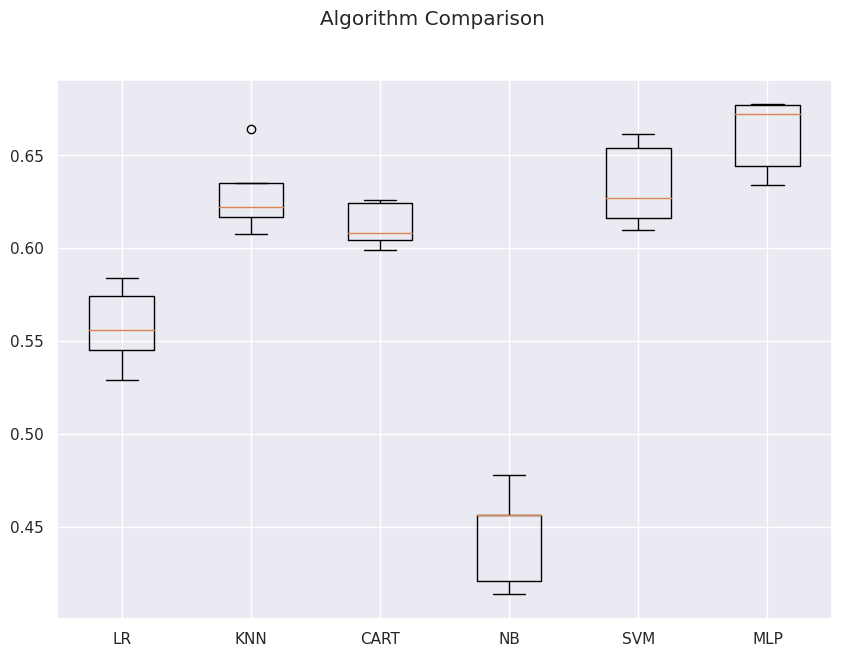

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(f1_results)
ax.set_xticklabels(names)
plt.show()

##Algorithm Performance Improvement

For both performance metrics, SVM was the best performing algorithm. Hence for performance improvements, we focus on SVM




### SVM Tuning

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.5, 1.0, 1.5, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = StratifiedKFold(n_splits=num_folds, shuffle = True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842277 using {'C': 2.0, 'kernel': 'rbf'}
0.810022 (0.008008) with: {'C': 0.1, 'kernel': 'linear'}
0.808459 (0.006513) with: {'C': 0.1, 'kernel': 'poly'}
0.831479 (0.006660) with: {'C': 0.1, 'kernel': 'rbf'}
0.772984 (0.007862) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.809833 (0.007856) with: {'C': 0.5, 'kernel': 'linear'}
0.826173 (0.007009) with: {'C': 0.5, 'kernel': 'poly'}
0.839530 (0.005308) with: {'C': 0.5, 'kernel': 'rbf'}
0.755033 (0.007567) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.809880 (0.007935) with: {'C': 1.0, 'kernel': 'linear'}
0.831478 (0.007559) with: {'C': 1.0, 'kernel': 'poly'}
0.841520 (0.004830) with: {'C': 1.0, 'kernel': 'rbf'}
0.754891 (0.007802) with: {'C': 1.0, 'kernel': 'sigmoid'}
0.810022 (0.007982) with: {'C': 1.5, 'kernel': 'linear'}
0.832710 (0.007066) with: {'C': 1.5, 'kernel': 'poly'}
0.842088 (0.005382) with: {'C': 1.5, 'kernel': 'rbf'}
0.749539 (0.006711) with: {'C': 1.5, 'kernel': 'sigmoid'}
0.810022 (0.008024) with: {'C': 2.0, 'kernel': 'linear'

###Feature Engineering 3: Feature removal/PCA

#### Feature Removal

In [ ]:
X_f= df.drop(['income','education', 'fnlwgt'], axis = 1)
Y_f = df['income']

X_train_f, X_valid_f, y_train_f, y_valid_f = train_test_split(X_f, Y_f, test_size = 0.3, stratify = Y_f, random_state = seed)
categorical = ['workclass', 'marital.status', 'race', 'sex', 'occupation', 'native.country', 'relationship']
for feature in categorical:
        le = LabelEncoder()
        X_train_f[feature] = le.fit_transform(X_train_f[feature])
        X_valid_f[feature] = le.transform(X_valid_f[feature])


pipelines_f = []
pipelines_f.append(('FRSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results_f = []
names_f = []
for name, model in pipelines_f:
  kfold = KFold(n_splits=num_folds, shuffle = True, random_state=seed)
  cv_results = cross_val_score(model, X_train_f, y_train_f, cv=kfold, scoring=scorer)
  results_f.append(cv_results)
  names_f.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

FRSVM: 0.632205


#### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_p = pca.fit(X_train)
print(pca.explained_variance_ratio_)

[0.17160698 0.09874533 0.09412497 0.09047009 0.0858318  0.08266646
 0.07814382 0.07380619 0.07122717 0.06351871 0.05739693 0.03246154]


In [ ]:
pca_pipelines = []
pca_pipelines.append(('PCASVM', Pipeline([('PCA', PCA()),('SVM', SVC())])))
pca_results = []
pca_names = []
for name, model in pca_pipelines:
  #kfold = KFold(n_splits=num_folds, shuffle = True, random_state=seed)
  kfold = KFold(n_splits=num_folds, shuffle = True)
  pcacv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scorer)
  pca_results.append(pcacv_results)
  pca_names.append(name)
  msg = "%s: %f" % (name, pcacv_results.mean())
  print(msg)

PCASVM: 0.631180


#### Recursive Feature Elimination

### Ensembling

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

AB: 0.855539
GBM: 0.860038
RF: 0.846303
ET: 0.838157


#### Accuracy

In [ ]:
ensemble_results = []
ensemble_names = []
for name, model in ensembles:
  kfold = StratifiedKFold(n_splits=num_folds, shuffle = True, random_state=seed)
 # kfold = StratifiedKFold(n_splits=num_folds, shuffle = True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  ensemble_results.append(cv_results)
  ensemble_names.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

KeyboardInterrupt: ignored

#### F1 score

In [ ]:
ensemble_results = []
ensemble_names = []
for name, model in ensembles:
  kfold = StratifiedKFold(n_splits=num_folds, shuffle = True, random_state=seed)
  #kfold = StratifiedKFold(n_splits=num_folds, shuffle = True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scorer)
  ensemble_results.append(cv_results)
  ensemble_names.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

AB: 0.672894
GBM: 0.681498
RF: 0.667850
ET: 0.652456


### Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_trai, random_state = seed)
#x_smote, y_smote = smote.fit_resample(X_train, y_train)
print('Orig Training shape', y_train.value_counts())
print('Samp Training shape', y_smote.value_counts())

Orig Training shape <=50K    15857
>50K      5256
Name: income, dtype: int64
Samp Training shape <=50K    15857
>50K     15857
Name: income, dtype: int64


#### F1 score

In [ ]:
sample_results = []
sample_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=num_folds, shuffle = True, random_state=seed)
  cv_results = cross_val_score(model, x_smote, y_smote, cv=kfold, scoring=scorer)
  sample_results.append(cv_results)
  sample_names.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

LR: 0.765042
KNN: 0.856761
CART: 0.850083
NB: 0.603860
SVM: 0.836191
MLP: 0.836844


In [ ]:
sample_results = []
sample_names = []
for name, model in ensembles:
  kfold = StratifiedKFold(n_splits=num_folds, shuffle = True, random_state=seed)
  #kfold = StratifiedKFold(n_splits=num_folds, shuffle = True)
  cv_results = cross_val_score(model, x_smote, y_smote, cv=kfold, scoring=scorer)
  sample_results.append(cv_results)
  sample_names.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

AB: 0.848634
GBM: 0.863680
RF: 0.888522
ET: 0.894198


#### Accuracy

In [ ]:
sample_results = []
sample_names = []
for name, model in ensembles:
  kfold = StratifiedKFold(n_splits=num_folds, shuffle = True, random_state=seed)
  #kfold = StratifiedKFold(n_splits=num_folds, shuffle = True)
  cv_results = cross_val_score(model, x_smote, y_smote, cv=kfold, scoring='accuracy')
  sample_results.append(cv_results)
  sample_names.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

AB: 0.846093
GBM: 0.860535
RF: 0.887999
ET: 0.892729


In [ ]:
sample_results = []
sample_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=num_folds, shuffle = True, random_state=seed)
  #kfold = StratifiedKFold(n_splits=num_folds, shuffle = True)
  cv_results = cross_val_score(model, x_smote, y_smote, cv=kfold, scoring='accuracy')
  sample_results.append(cv_results)
  sample_names.append(name)
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

LR: 0.766318
KNN: 0.848143
CART: 0.851233
NB: 0.695655
SVM: 0.827269
MLP: 0.829287


## Finalize Model

In [ ]:
model = GradientBoostingClassifier()
model.fit(x_smote, y_smote)
# estimate accuracy on validation dataset

predictions = model.predict(X_valid)
print(f1_score(y_valid, predictions, pos_label = '>50K'))

0.7085514834205934


In [ ]:
print(accuracy_score(y_valid, predictions))

0.8339042988175489


In [ ]:
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

       <=50K       0.93      0.84      0.88      6797
        >50K       0.63      0.81      0.71      2252

    accuracy                           0.83      9049
   macro avg       0.78      0.83      0.80      9049
weighted avg       0.86      0.83      0.84      9049

